In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

%matplotlib inline

In [2]:
!python -m spacy download en_core_web_sm
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import pandas as pd

# Load the dataset
file_path = 'blogs.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(                                                Data       Labels
 0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
 2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
 3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism,
 None)

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

In [8]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [9]:
# Apply preprocessing to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [10]:
# Display the first few rows to check the cleaned text
df[['Data', 'Cleaned_Data']].head()

,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

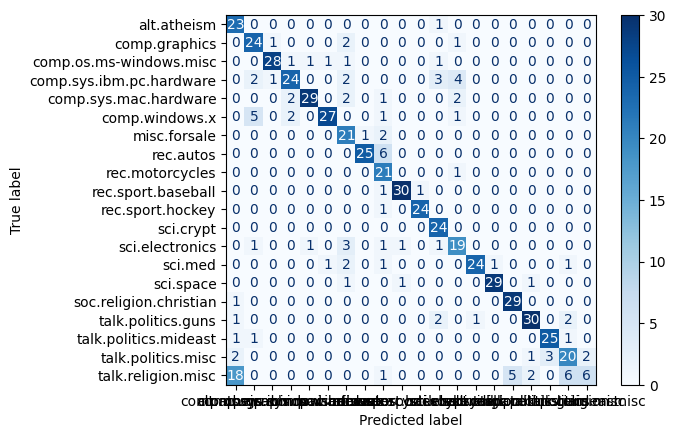

In [19]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap='Blues')
plt.show()

In [12]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])  # Features (TF-IDF matrix)
y = df['Labels']  # Target labels

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [17]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result

(0.8033333333333333,
 '                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.96      0.66        24\n           comp.graphics       0.73      0.86      0.79        28\n comp.os.ms-windows.misc       0.93      0.85      0.89        33\ncomp.sys.ibm.pc.hardware       0.83      0.67      0.74        36\n   comp.sys.mac.hardware       0.94      0.81      0.87        36\n          comp.windows.x       0.93      0.75      0.83        36\n            misc.forsale       0.62      0.88      0.72        24\n               rec.autos       0.96      0.81      0.88        31\n         rec.motorcycles       0.58      0.95      0.72        22\n      rec.sport.baseball       0.94      0.94      0.94        32\n        rec.sport.hockey       0.96      0.96      0.96        25\n               sci.crypt       0.75      1.00      0.86        24\n         sci.electronics       0.68      0.70      0.69        27\n                 sci.med       0.96  

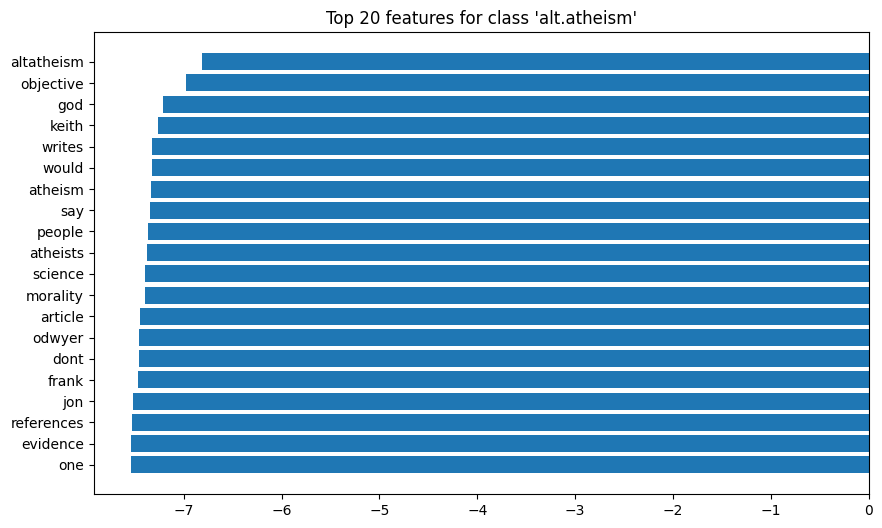

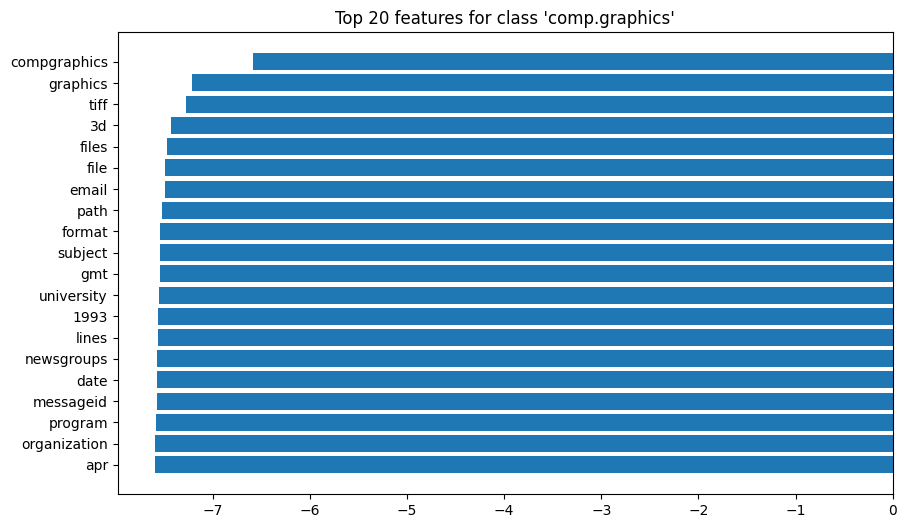

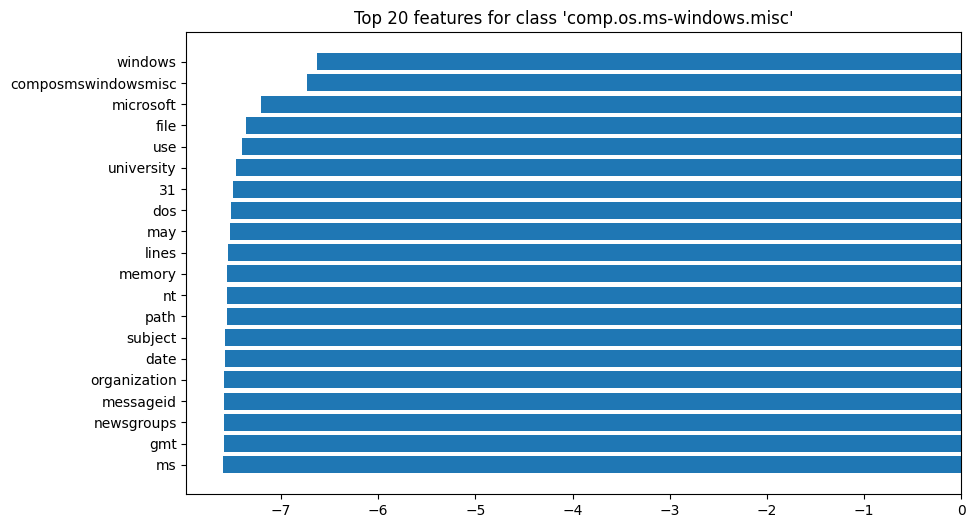

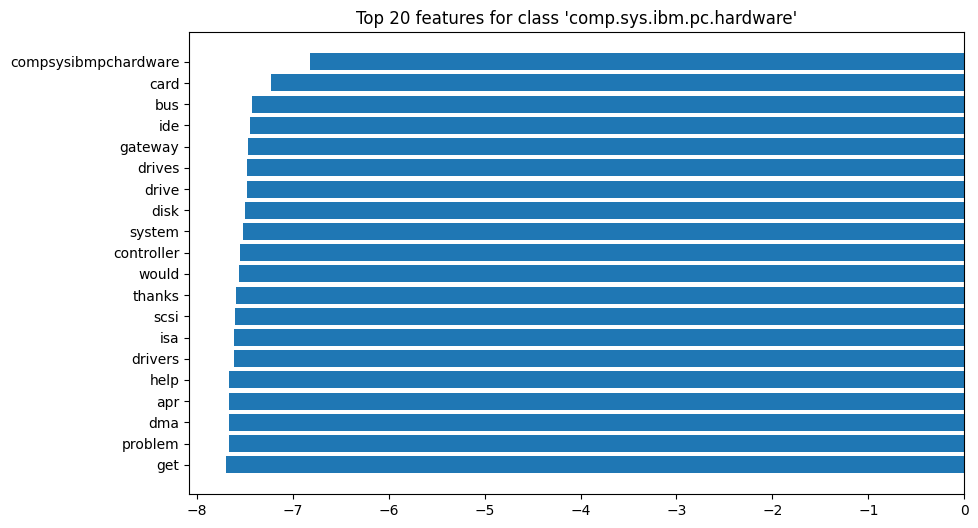

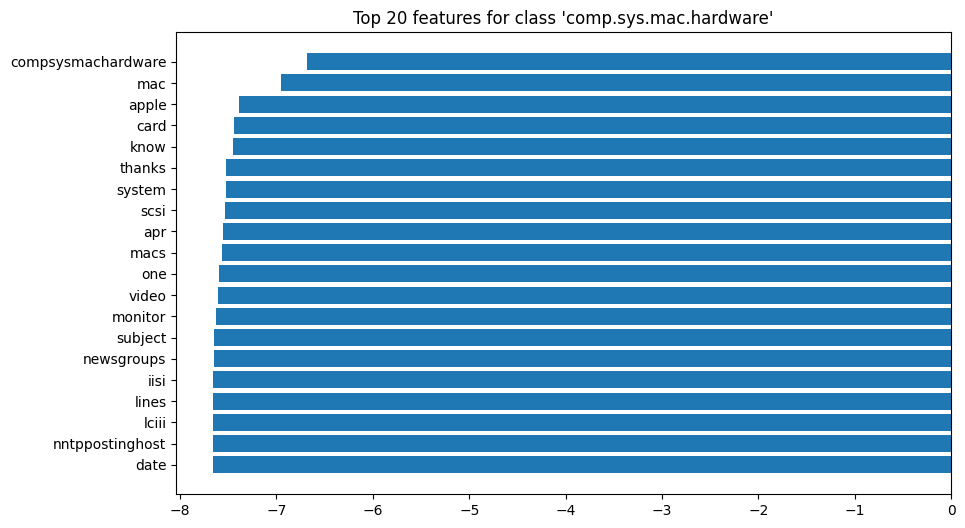

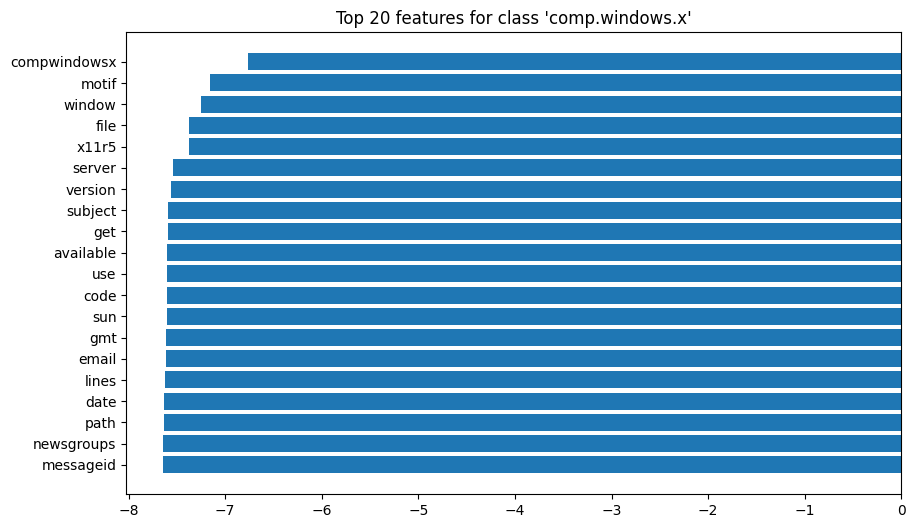

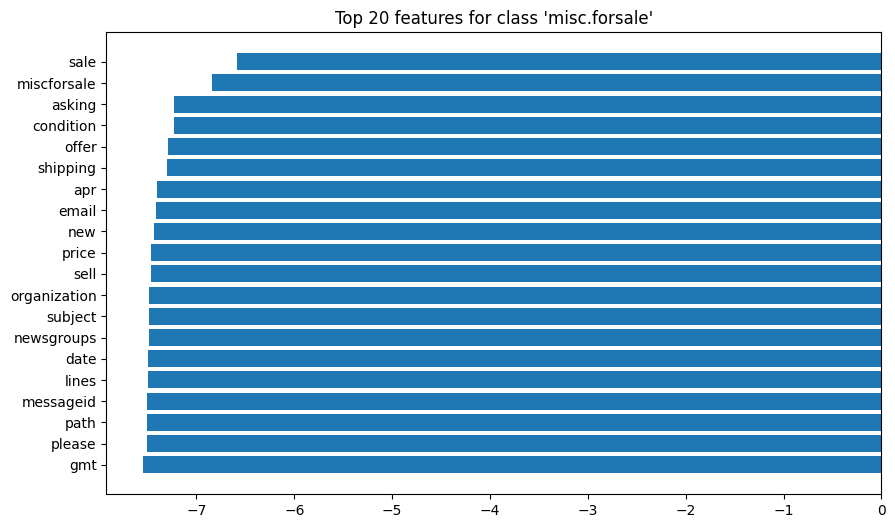

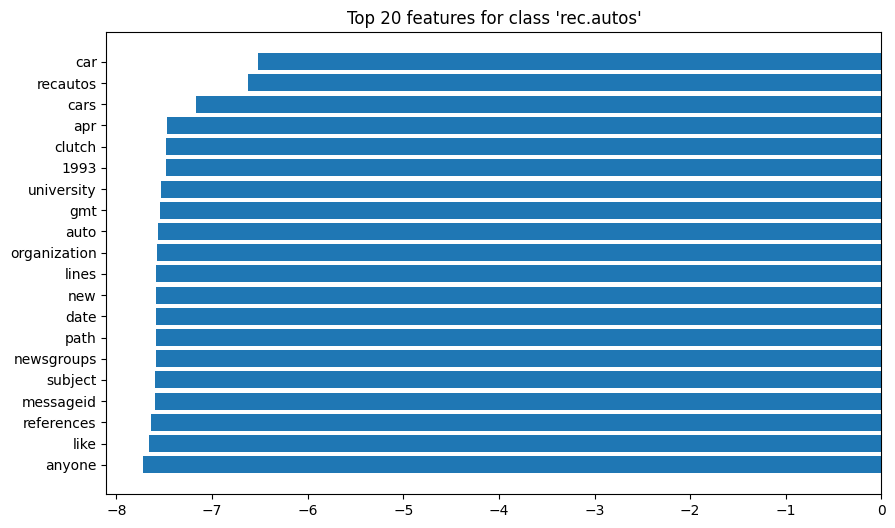

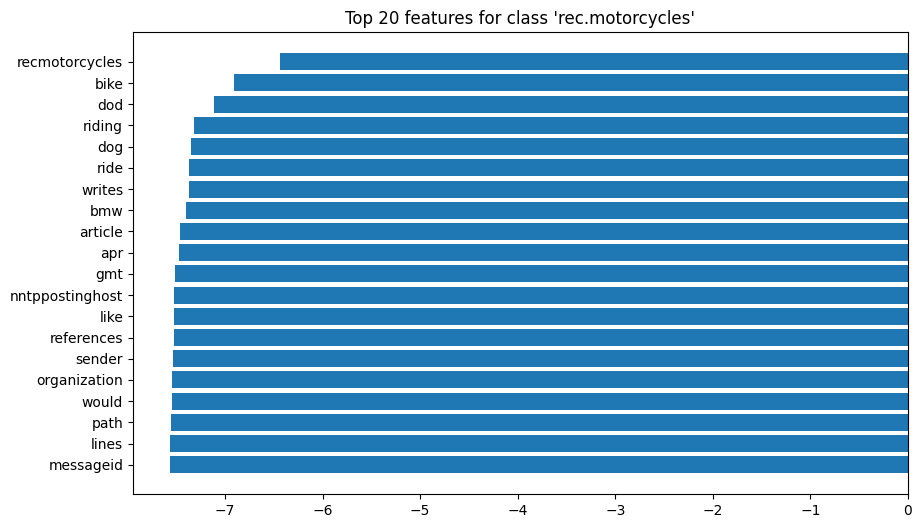

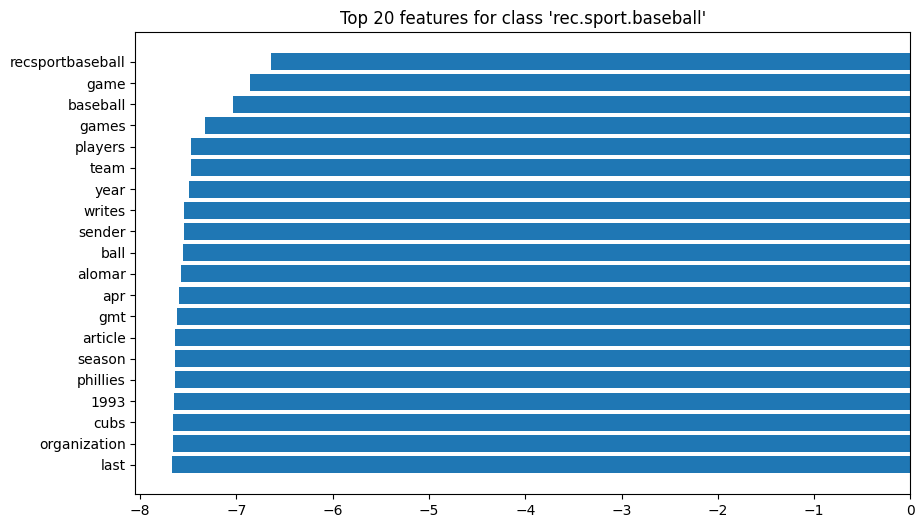

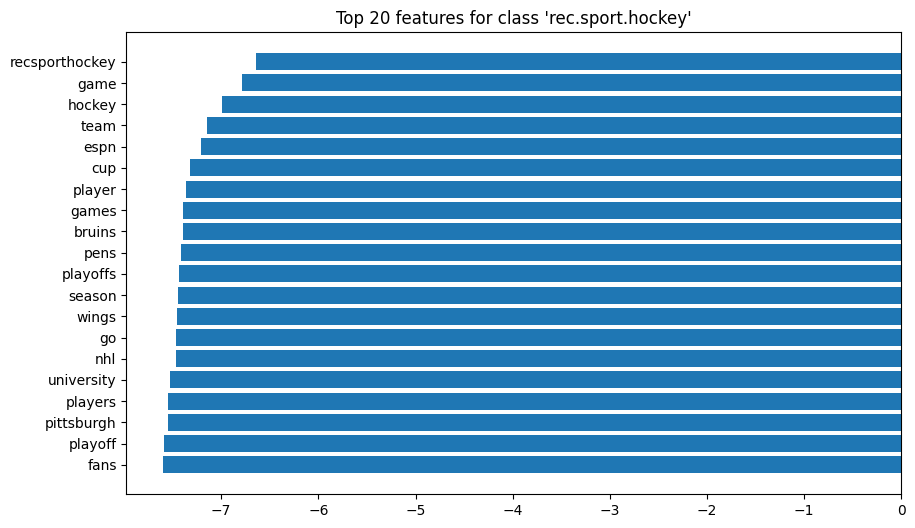

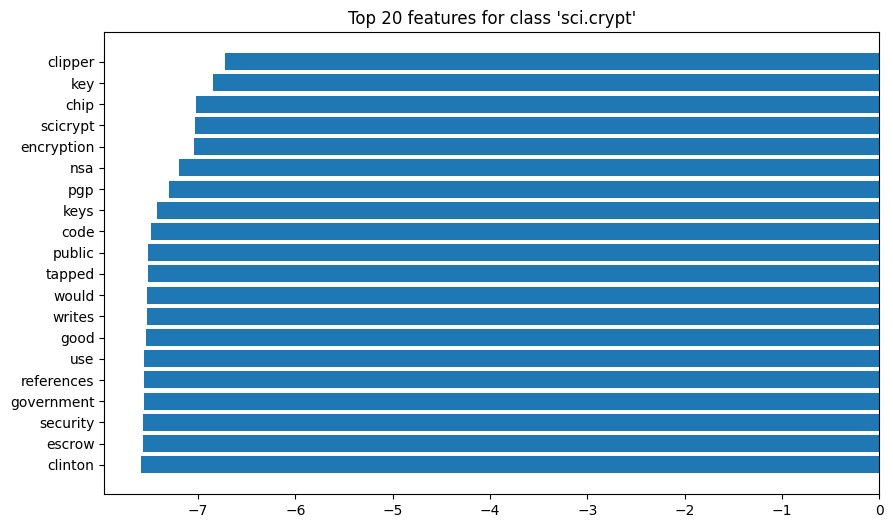

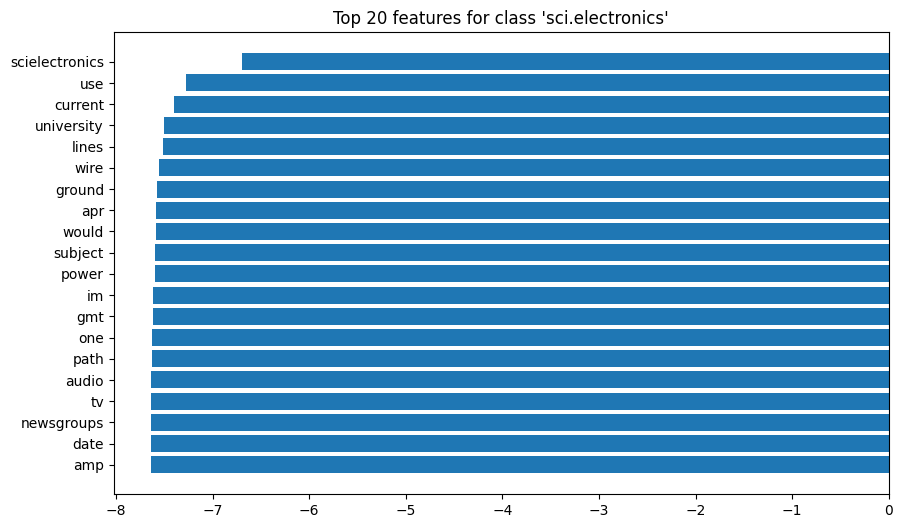

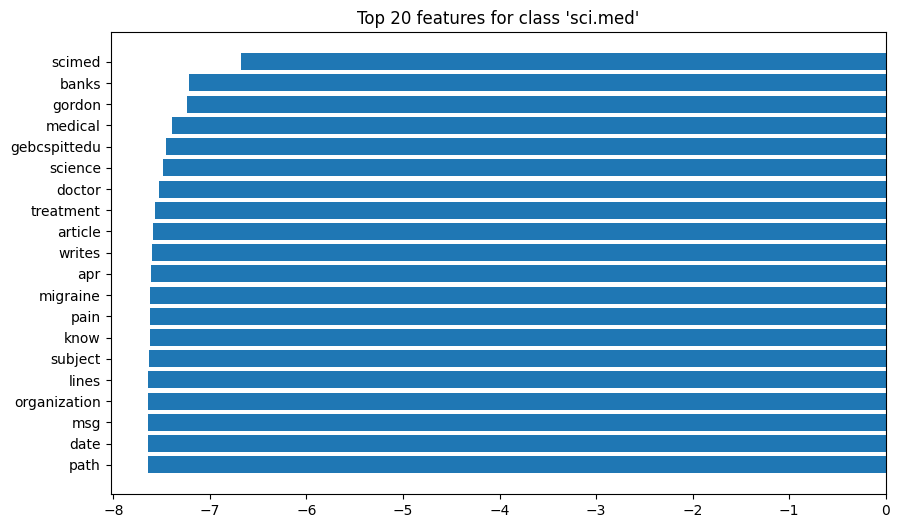

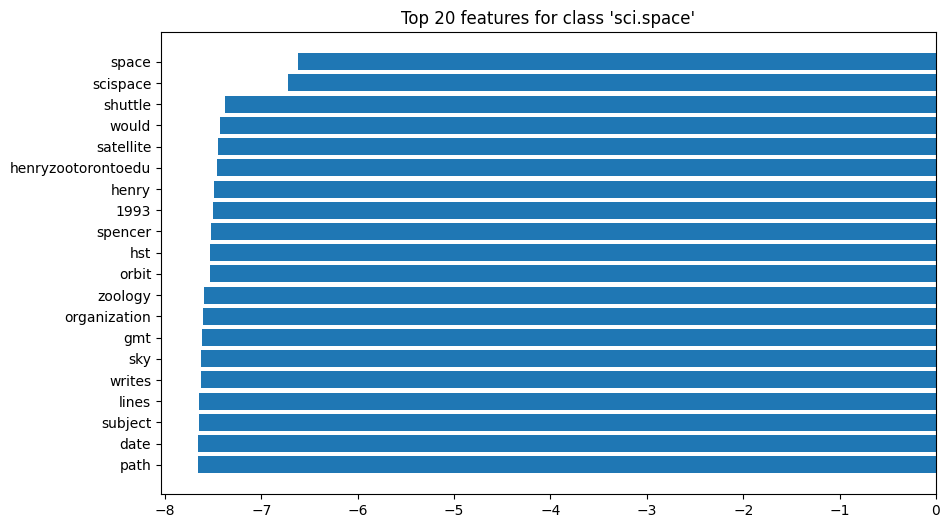

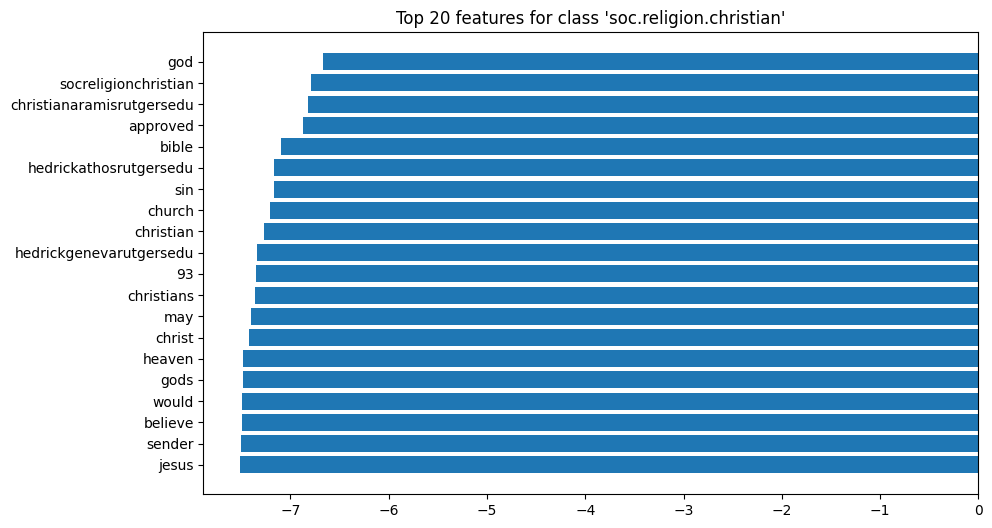

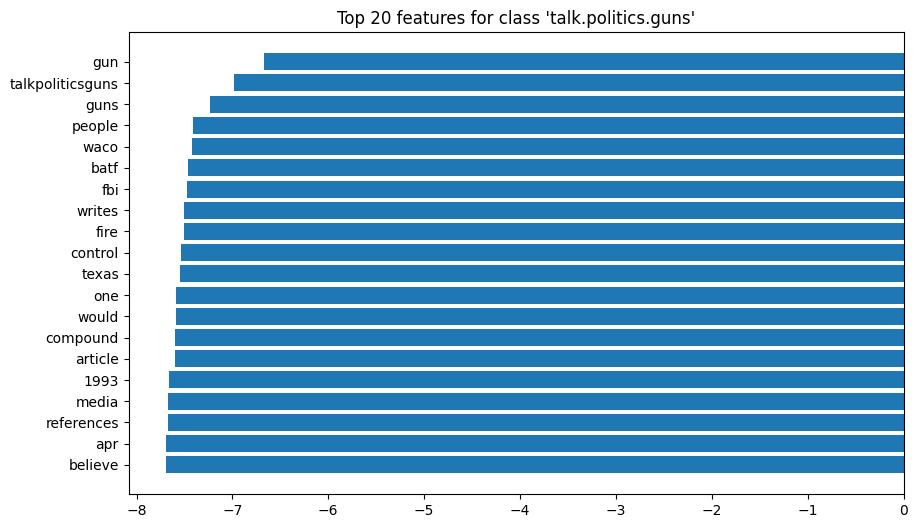

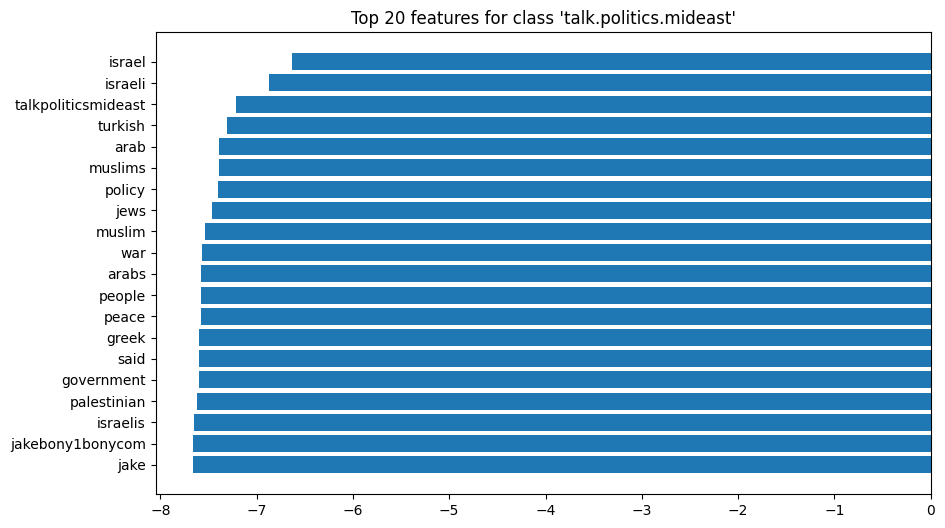

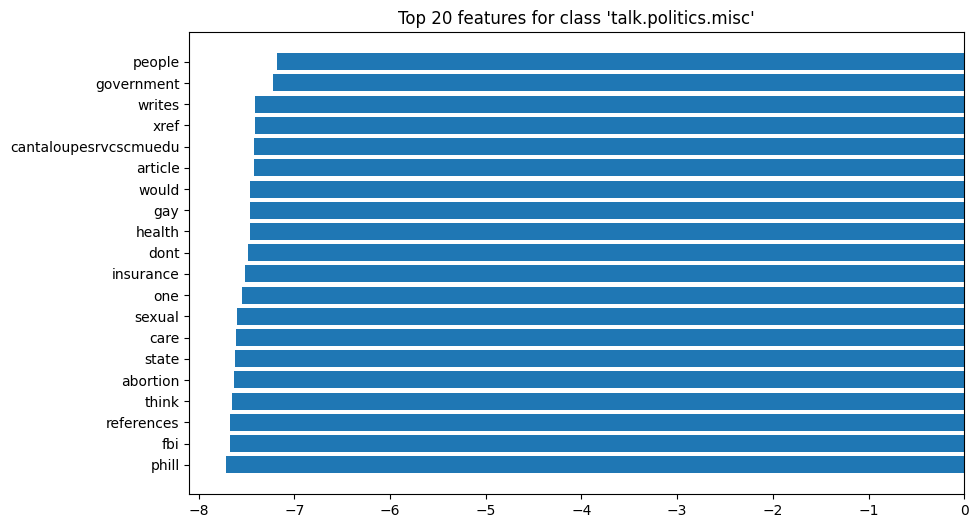

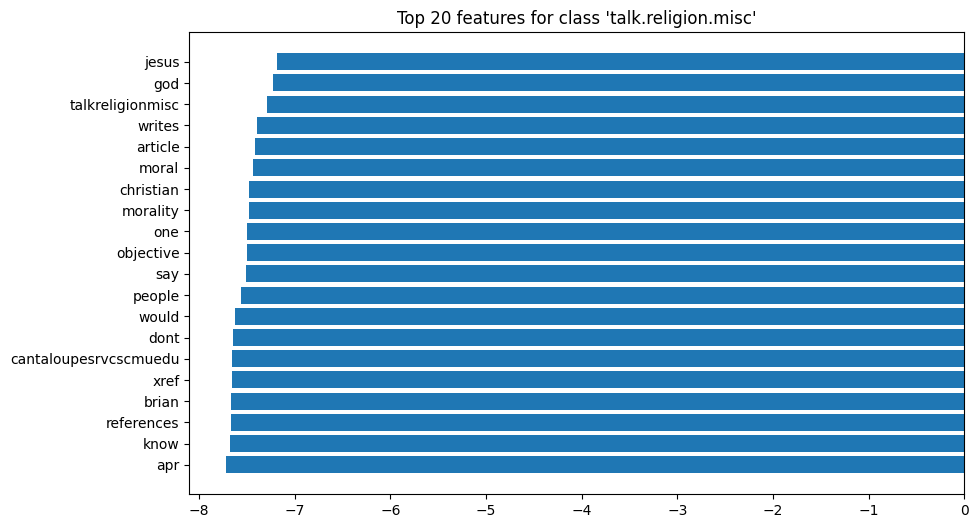

In [25]:
import numpy as np
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the log probabilities for each class
class_log_prob = nb_classifier.feature_log_prob_

# Plot the top N words per class
top_n = 20
for i, label in enumerate(nb_classifier.classes_):
    top_features = np.argsort(class_log_prob[i])[-top_n:]
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names[top_features], class_log_prob[i, top_features])
    plt.title(f"Top {top_n} features for class '{label}'")
    plt.show()


In [26]:
from textblob import TextBlob

# Function to calculate sentiment using TextBlob
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [27]:
# Apply sentiment analysis to the cleaned data
df['Sentiment_TextBlob'] = df['Cleaned_Data'].apply(get_sentiment_textblob)

In [28]:
# Display the first few rows with sentiment scores
df[['Cleaned_Data', 'Sentiment_TextBlob']].head()

,Cleaned_Data,Sentiment_TextBlob
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.058664
1,newsgroups altatheism path cantaloupesrvcscmue...,-0.002480
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,0.025719
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.059244
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.149802


In [29]:
# Function to categorize sentiment based on polarity scores
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [31]:
# Categorize sentiment for both TextBlob and VADER (if using both)
df['Sentiment_Category_TextBlob'] = df['Sentiment_TextBlob'].apply(categorize_sentiment)
#df['Sentiment_Category_VADER'] = df['Sentiment_VADER'].apply(categorize_sentiment)


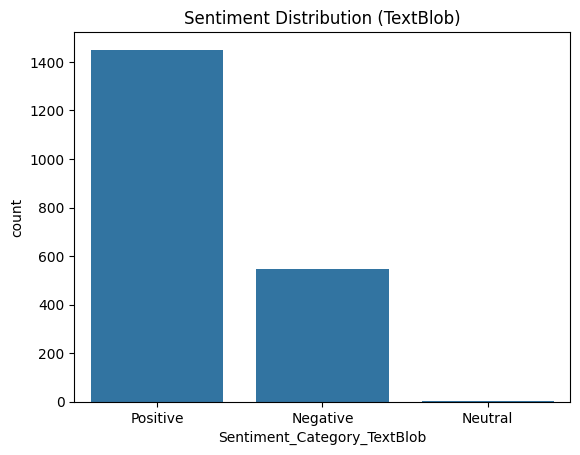

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment categories
sns.countplot(x='Sentiment_Category_TextBlob', data=df)
plt.title('Sentiment Distribution (TextBlob)')
plt.show()

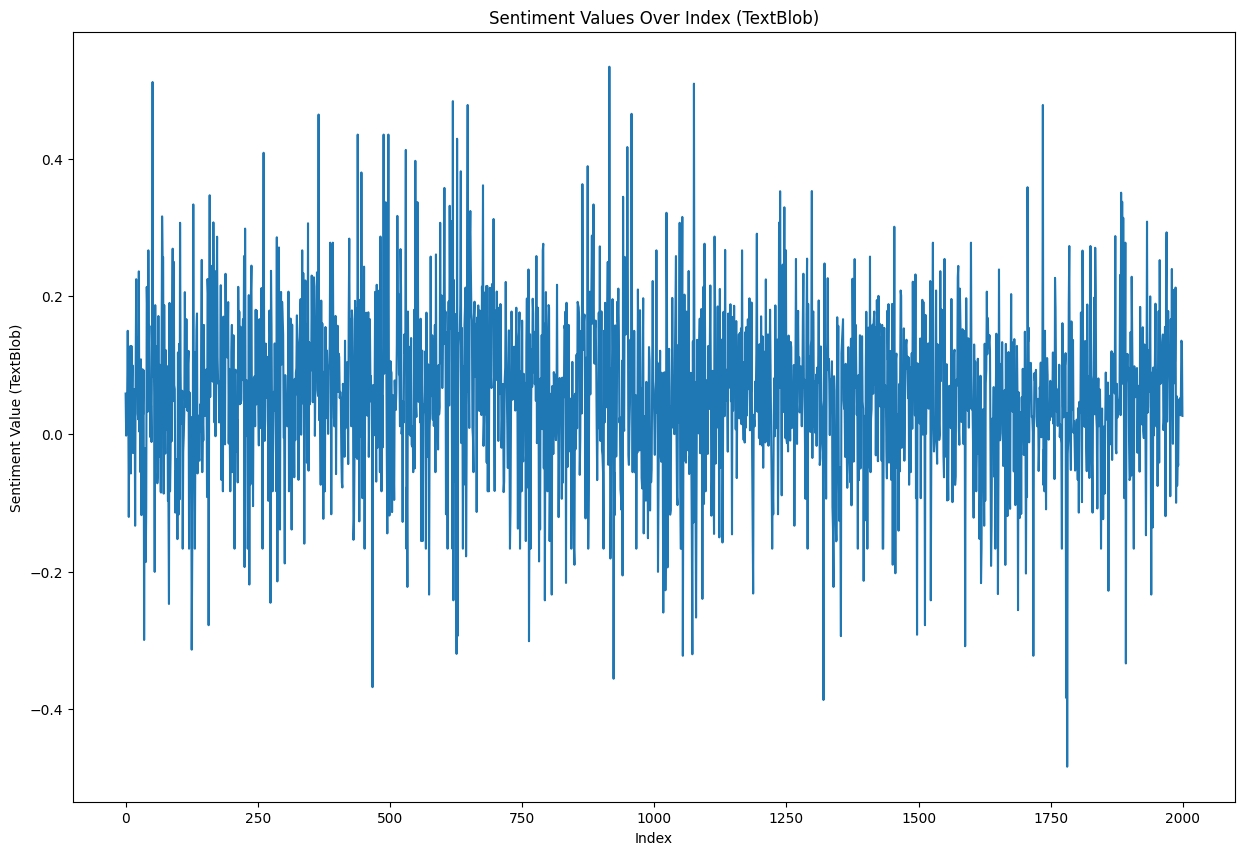

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the DataFrame has a proper index column for plotting
df.reset_index(inplace=True)

# Plotting the sentiment values using TextBlob
plt.figure(figsize=(15, 10))
sns.lineplot(y='Sentiment_TextBlob', x='index', data=df)
plt.title('Sentiment Values Over Index (TextBlob)')
plt.xlabel('Index')
plt.ylabel('Sentiment Value (TextBlob)')
plt.show()
